In [1]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import GBM
import pandas as pd
import helper

In [3]:
S0 = 100
mu = 0.05
sigma = 0.2
gbm = GBM.GBM(S0, mu, sigma)

In [4]:
T = 1
n = 252
M = 1000
gbm.simulate(T, n, M)

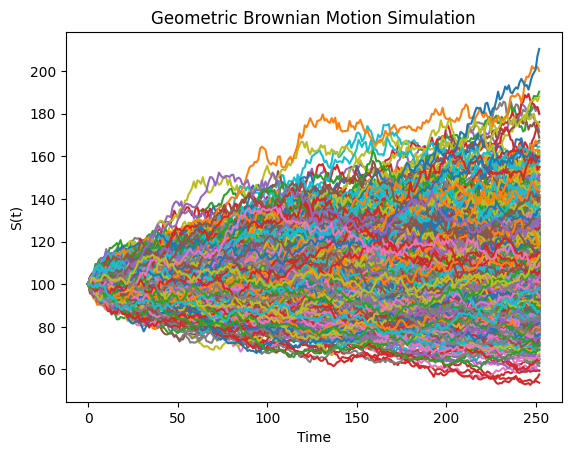

In [5]:
gbm.plot()

Q4.3.a

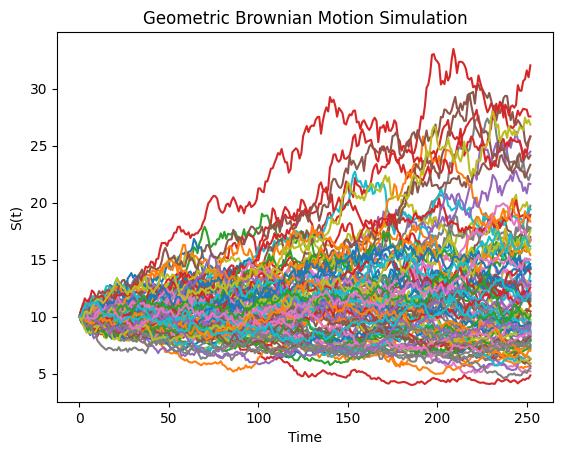

In [6]:
S0=10
mu=0.2
sigma=0.4
T=1
N=252
gbm = GBM.GBM(S0, mu, sigma)
gbm.simulate(T, N, 100)
gbm.plot()

In [7]:
df = pd.read_excel('GSPC.xlsx')
mu, sigma_sq, v_daily = helper.parameterEsimation(df)
print(f"mu: {mu}, sigma_sq: {sigma_sq}, v_daily: {v_daily}")

mu: 0.0005052413572726361, sigma_sq: 6.532924917348382e-05, v_daily: 0.0004725767326858942


In [8]:
mu, sigma_sq, v_daily = helper.parameterEstimationWithTicker("^GSPC", "2017-01-01", "2019-12-31")
print(f"mu: {mu}, sigma_sq: {sigma_sq}, v_daily: {v_daily}")

mu: 0.0005052413572485279, sigma_sq: 6.532924922090473e-05, v_daily: 0.0004725767326380755


In [9]:
S0 = df.iloc[-1]["Close"]

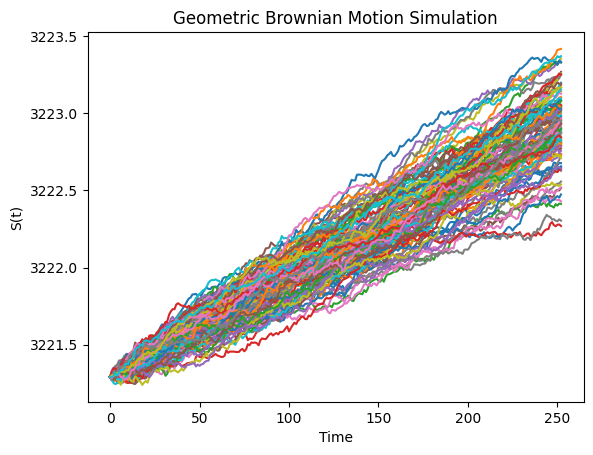

In [10]:
GSPC_GBM = GBM.GBM(S0, mu, sigma_sq)
GSPC_GBM.simulate(1, 252, 100)
GSPC_GBM.plot()

In [11]:
import yfinance as yf
ticker = yf.Ticker("^GSPC")
hist = ticker.history(start="2020-01-01", end="2020-12-31")

<Axes: xlabel='Date'>

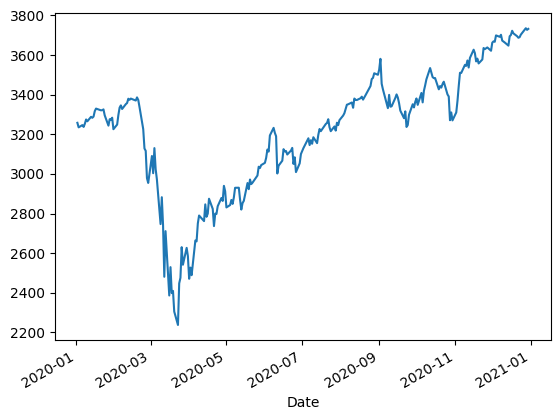

In [12]:
hist["Close"].plot()

In [2]:
%pip install scipy

  Using cached scipy-1.14.1-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp312-cp312-macosx_14_0_arm64.whl (23.1 MB)
Note: you may need to restart the kernel to use updated packages.


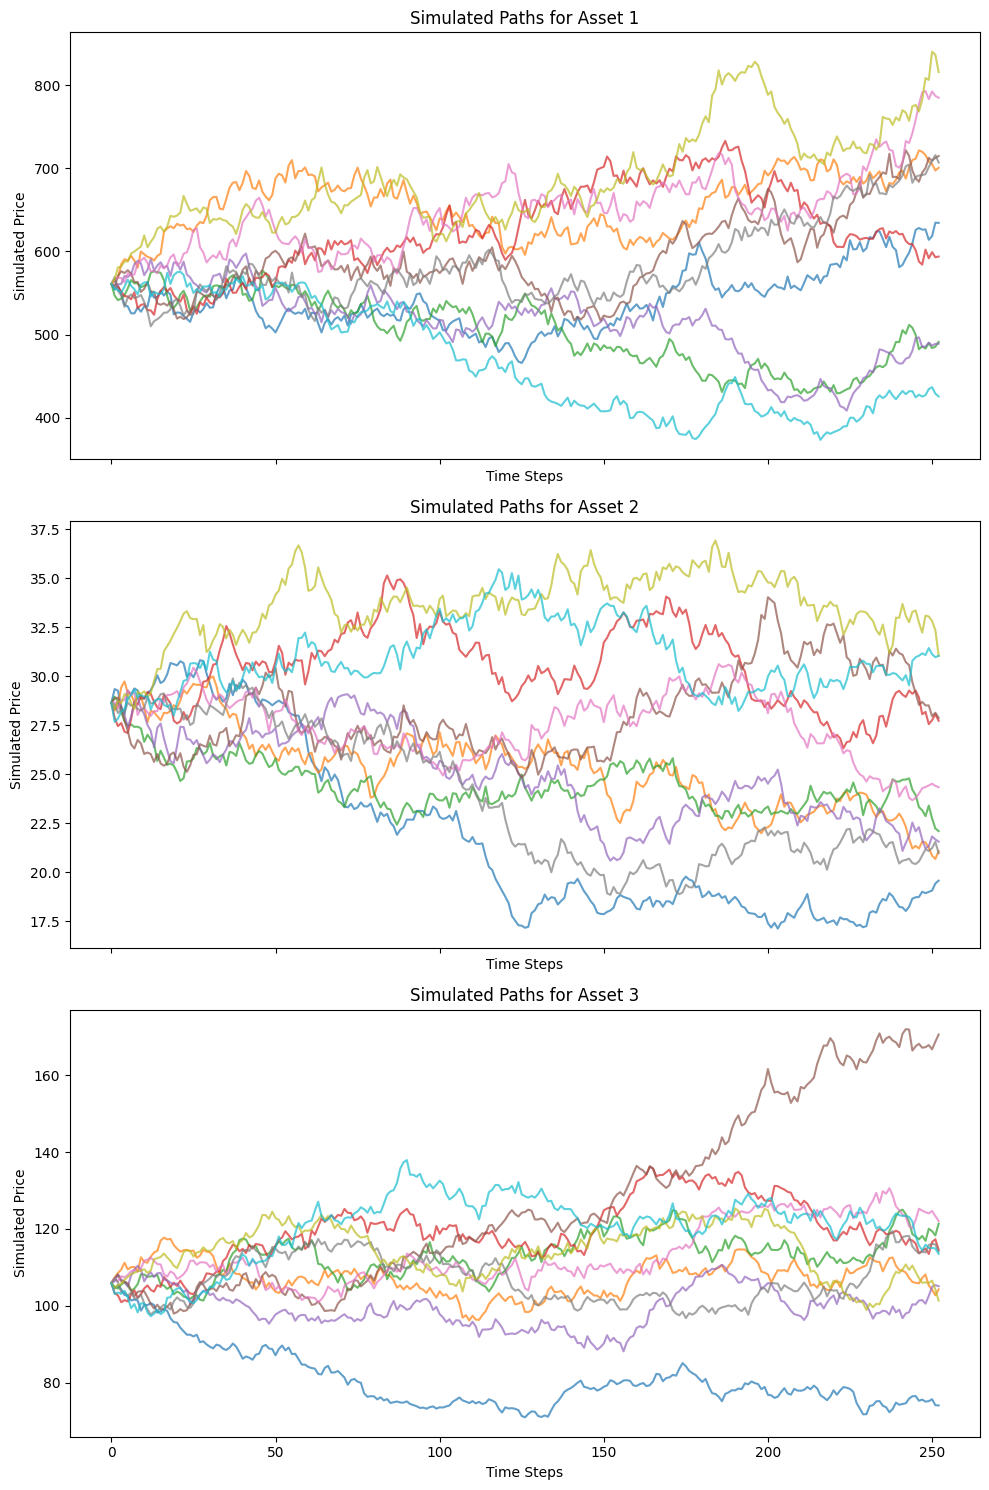

In [1]:
from GBM import MultiBS
import numpy as np

path1 = "datasets/UNH.csv"
path2 = "datasets/PFE.csv"
path3 = "datasets/MRK.csv"

multi_bs = MultiBS(path1, path2, path3)

forward_simulation = multi_bs.simulate_multi_GBM_exact(T=1, M=10000)
v, sigma = multi_bs.calibrate_model(forward_simulation)
simul = multi_bs.simulate_multi_GBM_exact(T=1, M=10)
multi_bs.plot(simul)

/Users/khor/Documents/MH4518 Financial Modelling/Project/GBM.py:166: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left')


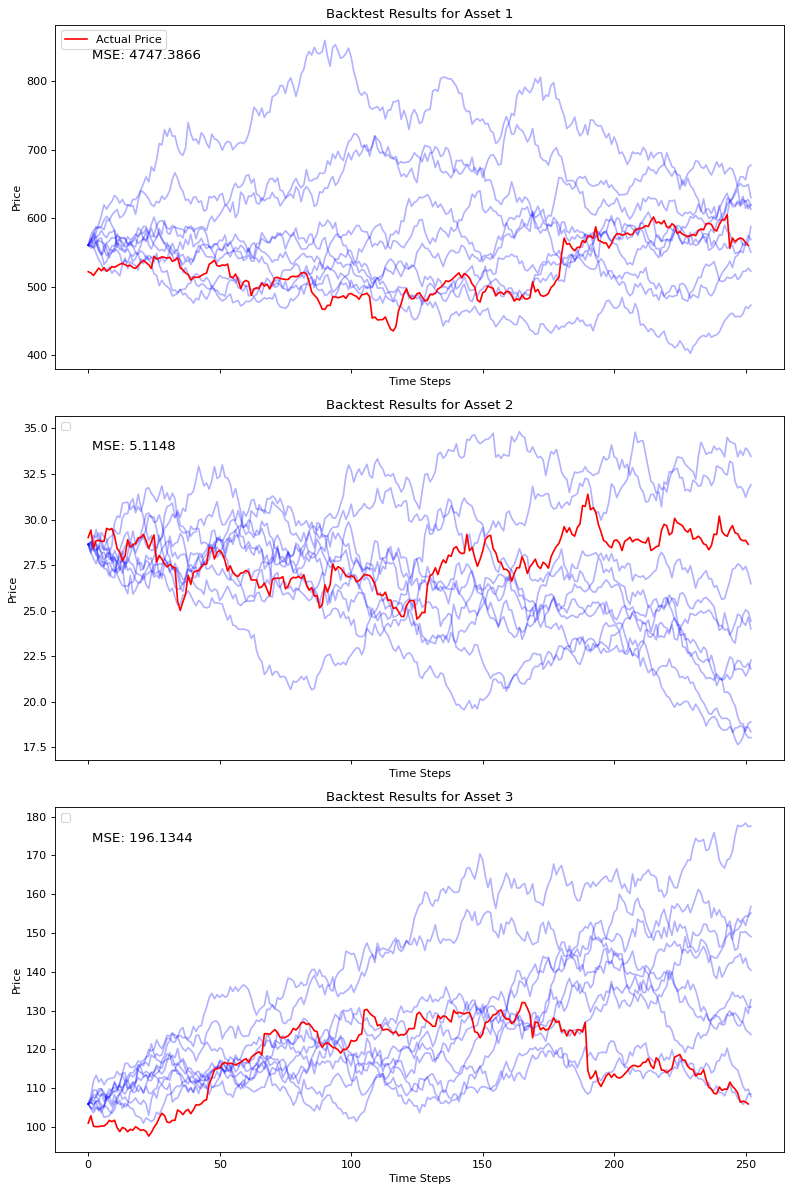

Mean Squared Error (MSE) for each asset: [4747.38655594    5.11477085  196.13439221]


array([4747.38655594,    5.11477085,  196.13439221])

In [2]:
multi_bs.backtest(T=1, M=10)